In [6]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic

In [20]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
dataset = "cancer.csv"  # Nombre del archivo
data = pd.read_csv(dataset)

# Ver las primeras filas y el resumen de la información
print("Primeras filas del dataset:")
print(data.head())

print("\nResumen del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

# Identificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

Primeras filas del dataset:
   Unnamed: 0  inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  \
0           1   3.0   306       2   74    1      1.0      90.0      100.0   
1           2   3.0   455       2   68    1      0.0      90.0       90.0   
2           3   3.0  1010       1   56    1      0.0      90.0       90.0   
3           4   5.0   210       2   57    1      1.0      90.0       60.0   
4           5   1.0   883       2   60    1      0.0     100.0       90.0   

   meal.cal  wt.loss  
0    1175.0      NaN  
1    1225.0     15.0  
2       NaN     15.0  
3    1150.0     11.0  
4       NaN      0.0  

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64 

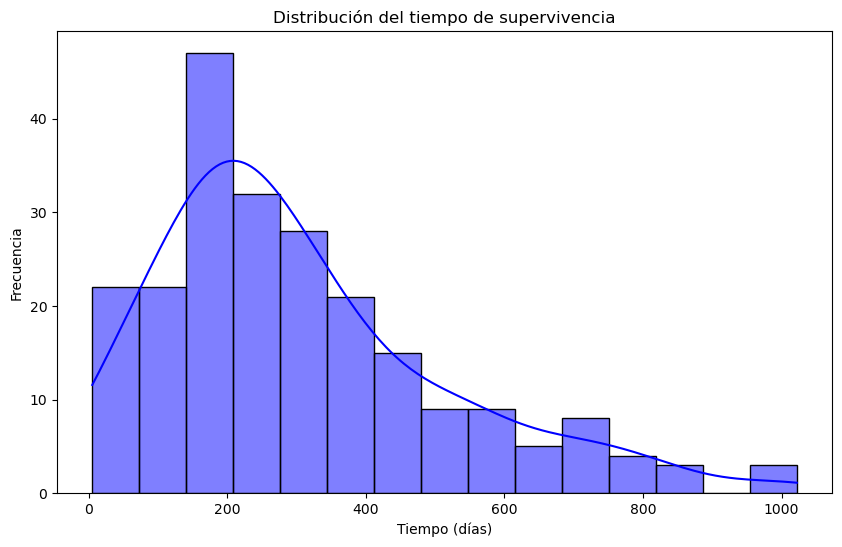

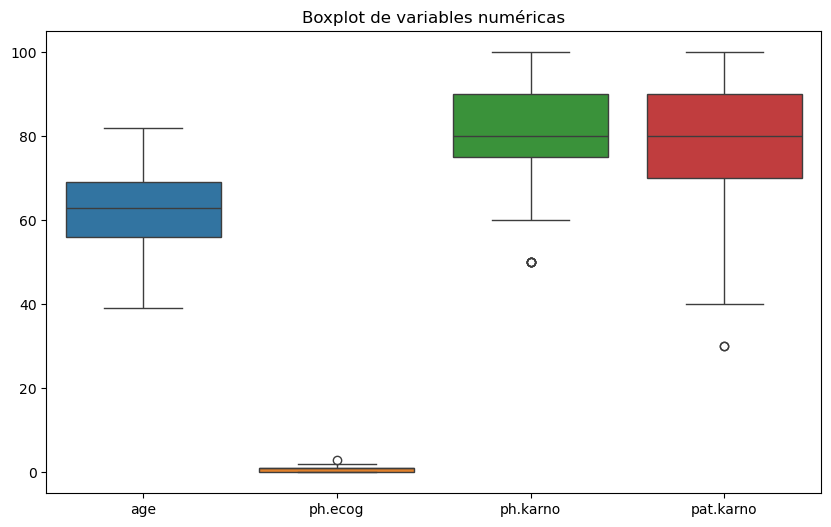

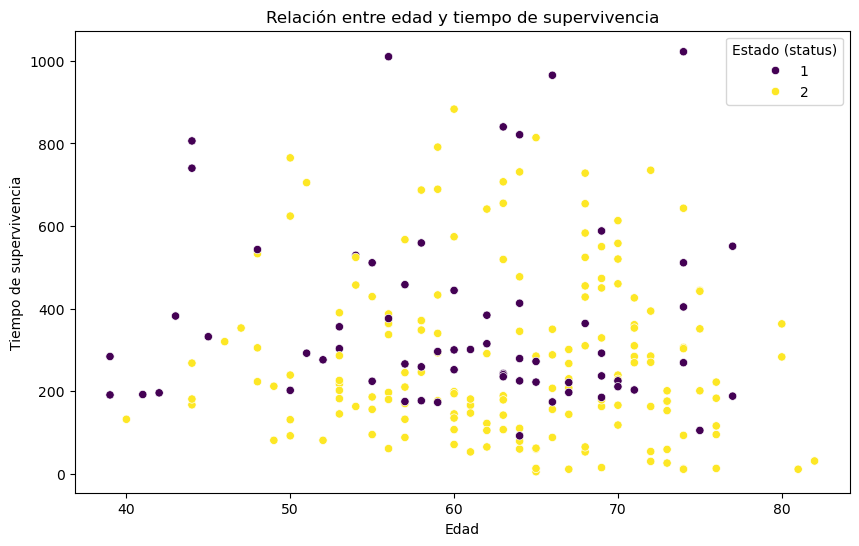

In [22]:

# Visualización de las distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(data['time'], kde=True, bins=15, color='blue')
plt.title('Distribución del tiempo de supervivencia')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'ph.ecog', 'ph.karno', 'pat.karno']])
plt.title('Boxplot de variables numéricas')
plt.show()

# Gráfico de dispersión: relación entre edad y tiempo de supervivencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['time'], hue=data['status'], palette='viridis')
plt.title('Relación entre edad y tiempo de supervivencia')
plt.xlabel('Edad')
plt.ylabel('Tiempo de supervivencia')
plt.legend(title='Estado (status)', loc='upper right')
plt.show()

In [26]:
# Probabilidad de supervivencia más allá de 500 días
t = 500
survival_prob = np.exp(-(t / scale)**shape)
print(f"Probabilidad de supervivencia más allá de {t} días: {survival_prob:.2%}")

Probabilidad de supervivencia más allá de 500 días: 16.76%


In [28]:
median_survival = scale * (np.log(2))**(1 / shape)
print(f"Mediana de supervivencia: {median_survival:.2f} días")

Mediana de supervivencia: 262.26 días


In [30]:
# Tasa de riesgo en un momento dado (por ejemplo, t=300 días)
t = 300
hazard_rate = (shape / scale) * (t / scale)**(shape - 1)
print(f"Tasa de riesgo a los {t} días: {hazard_rate:.4f}")

Tasa de riesgo a los 300 días: 0.0041


In [32]:
# Mostrar los parámetros ajustados
print(f"Parámetros de Weibull ajustados:")
print(f"Forma (k): {shape}")
print(f"Escala (λ): {scale}")
print(f"Desplazamiento (loc): {loc}")

Parámetros de Weibull ajustados:
Forma (k): 1.4669444763740471
Escala (λ): 336.6996325975274
Desplazamiento (loc): 0


# Estimacion de los 3 parametros de la Weinull  y Validacion del Ajuste del Modelo con Kolmogrov

Parámetros de Weibull ajustados (3 parámetros):
Forma (shape): 1.4705537254576733
Escala (scale): 337.2781371382557
Desplazamiento (loc): -0.3823901125277172


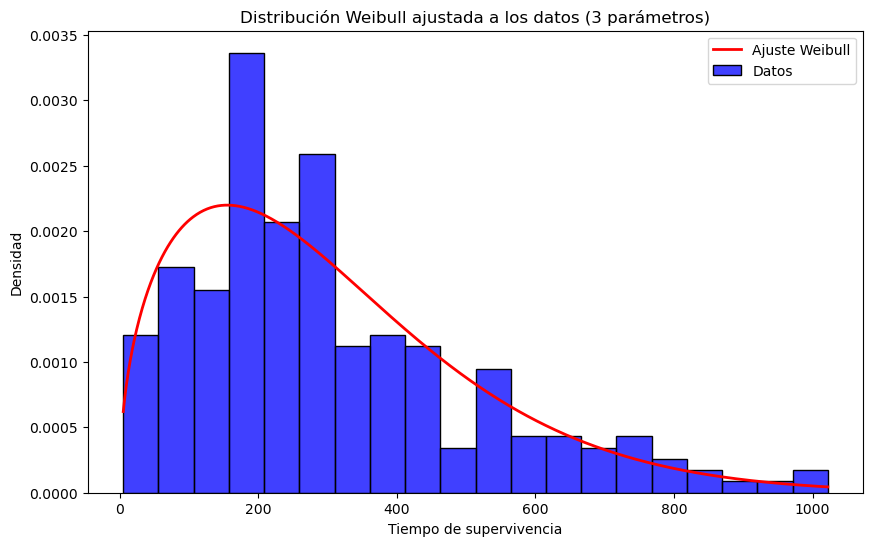


Estadístico de Kolmogorov-Smirnov: 0.06330218335924759
p-valor: 0.3073368238875346
No se puede rechazar la hipótesis nula: los datos se ajustan bien a una distribución Weibull.


In [34]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

# Extraer la variable de tiempo de supervivencia
survival_time = data['time']

# Ajustar la distribución Weibull con tres parámetros
shape, loc, scale = weibull_min.fit(survival_time)  # loc es libre aquí

# Mostrar los parámetros ajustados
print(f"Parámetros de Weibull ajustados (3 parámetros):")
print(f"Forma (shape): {shape}")
print(f"Escala (scale): {scale}")
print(f"Desplazamiento (loc): {loc}")

# Crear un histograma de los datos originales
plt.figure(figsize=(10, 6))
sns.histplot(survival_time, kde=False, bins=20, color='blue', label='Datos', stat='density')

# Generar valores Weibull usando los parámetros ajustados
x = np.linspace(survival_time.min(), survival_time.max(), 1000)
weibull_pdf = weibull_min.pdf(x, shape, loc, scale)

# Trazar la función ajustada
plt.plot(x, weibull_pdf, 'r-', label='Ajuste Weibull', lw=2)
plt.title('Distribución Weibull ajustada a los datos (3 parámetros)')
plt.xlabel('Tiempo de supervivencia')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Validación del ajuste con Kolmogorov-Smirnov
# Calcular la prueba KS entre los datos y la Weibull ajustada
ks_stat, ks_p_value = kstest(survival_time, "weibull_min", args=(shape, loc, scale))
print(f"\nEstadístico de Kolmogorov-Smirnov: {ks_stat}")
print(f"p-valor: {ks_p_value}")

if ks_p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos se ajustan bien a una distribución Weibull.")
else:
    print("Se rechaza la hipótesis nula: los datos no se ajustan a una distribución Weibull.")


In [36]:
print(f"Parámetros de Weibull ajustados:")
print(f"Forma (k): {shape}")
print(f"Escala (λ): {scale}")
print(f"Desplazamiento (loc): {loc}")

Parámetros de Weibull ajustados:
Forma (k): 1.4705537254576733
Escala (λ): 337.2781371382557
Desplazamiento (loc): -0.3823901125277172


# Estimacion de parametros con Verosimitud

Parámetros estimados por Máxima Verosimilitud (MLE):
Forma (k): 1.4705869996200502
Desplazamiento (loc): -0.38370109441524514
Escala (λ): 337.2910389304935


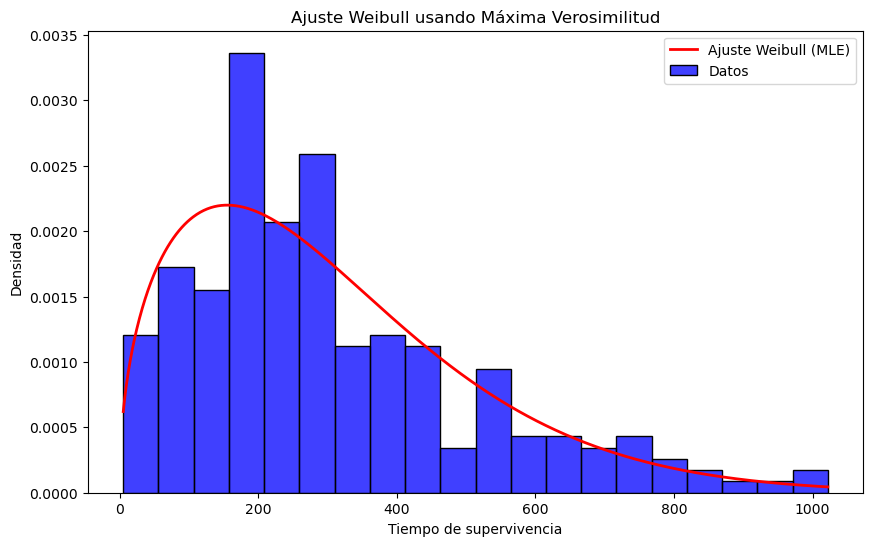

In [38]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de tiempo de supervivencia
survival_time = data['time'].values

# Función de verosimilitud negativa para Weibull (3 parámetros)
def negative_log_likelihood(params, data):
    k, loc, lambd = params
    if k <= 0 or lambd <= 0:  # Los parámetros deben ser positivos
        return np.inf
    likelihoods = weibull_min.logpdf(data, k, loc=loc, scale=lambd)
    return -np.sum(likelihoods)

# Inicialización de parámetros [forma (k), desplazamiento (loc), escala (lambda)]
initial_guess = [1.5, 0, np.mean(survival_time)]

# Optimización para minimizar la verosimilitud negativa
result = minimize(negative_log_likelihood, initial_guess, args=(survival_time,), method='L-BFGS-B',
                  bounds=[(1e-5, None), (None, None), (1e-5, None)])  # Restringir k, lambda > 0

# Parámetros óptimos
k_mle, loc_mle, lambd_mle = result.x
print(f"Parámetros estimados por Máxima Verosimilitud (MLE):")
print(f"Forma (k): {k_mle}")
print(f"Desplazamiento (loc): {loc_mle}")
print(f"Escala (λ): {lambd_mle}")

# Visualización del ajuste
plt.figure(figsize=(10, 6))
sns.histplot(survival_time, kde=False, bins=20, color='blue', label='Datos', stat='density')

# Generar valores Weibull usando los parámetros estimados
x = np.linspace(survival_time.min(), survival_time.max(), 1000)
weibull_pdf = weibull_min.pdf(x, k_mle, loc=loc_mle, scale=lambd_mle)

# Trazar la función ajustada
plt.plot(x, weibull_pdf, 'r-', label='Ajuste Weibull (MLE)', lw=2)
plt.title('Ajuste Weibull usando Máxima Verosimilitud')
plt.xlabel('Tiempo de supervivencia')
plt.ylabel('Densidad')
plt.legend()
plt.show()


In [47]:
# Probabilidad de supervivencia más allá de 500 días
t = 500
survival_prob = np.exp(-(t / scale)**shape)
print(f"Probabilidad de supervivencia más allá de {t} días: {survival_prob:.2%}")

Probabilidad de supervivencia más allá de 500 días: 16.79%


In [49]:
median_survival = scale * (np.log(2))**(1 / shape)
print(f"Mediana de supervivencia: {median_survival:.2f} días")

Mediana de supervivencia: 262.87 días


In [51]:
# Tasa de riesgo en un momento dado (por ejemplo, t=300 días)
t = 300
hazard_rate = (shape / scale) * (t / scale)**(shape - 1)
print(f"Tasa de riesgo a los {t} días: {hazard_rate:.4f}")

Tasa de riesgo a los 300 días: 0.0041


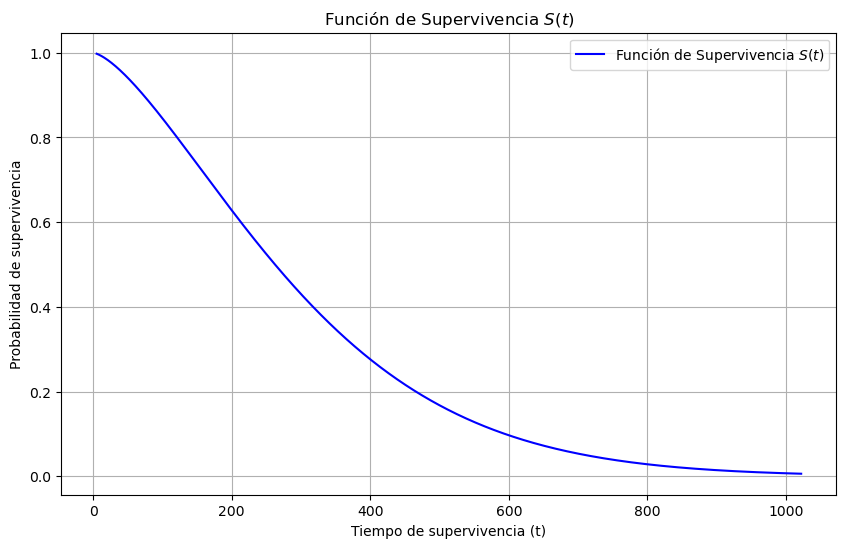

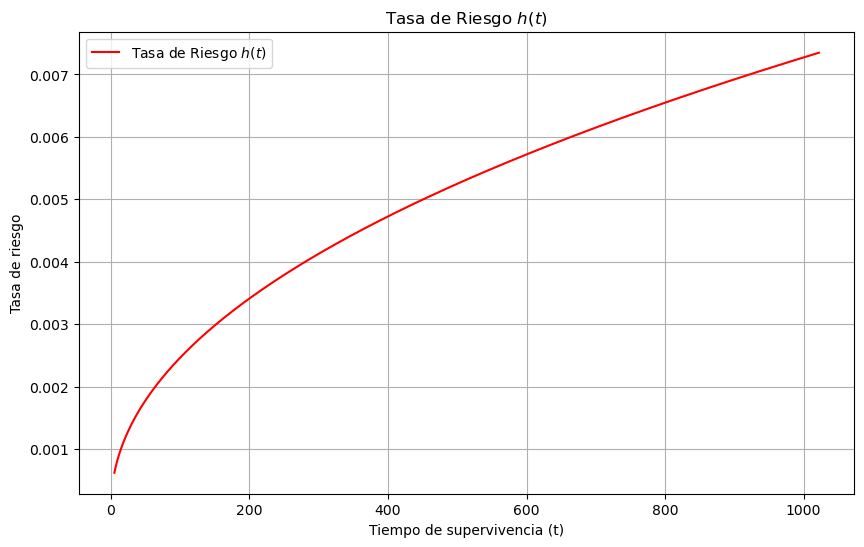

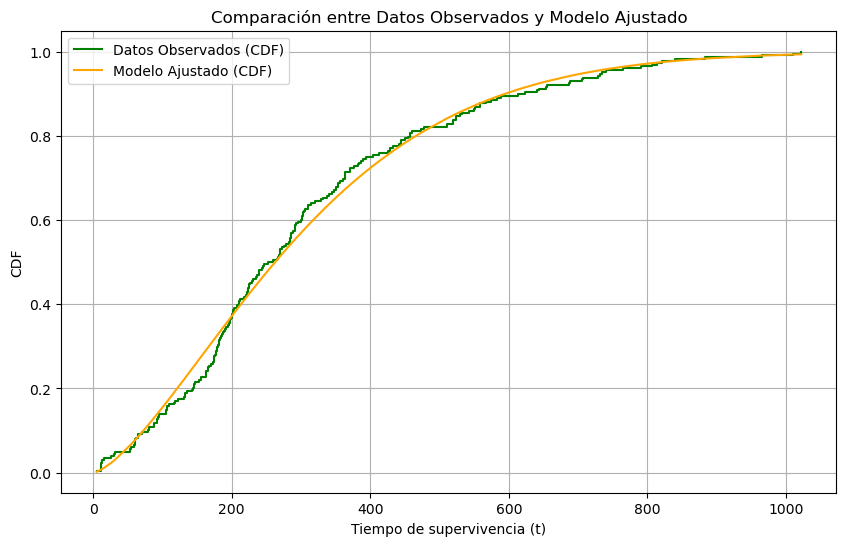

In [53]:
# Función de supervivencia S(t)
def survival_function(t, k, loc, lambd):
    return np.where(t > loc, np.exp(-((t - loc) / lambd) ** k), 1)

# Tasa de riesgo h(t)
def hazard_rate(t, k, loc, lambd):
    return np.where(t > loc, (k / lambd) * ((t - loc) / lambd) ** (k - 1), 0)

# Rango de tiempo para gráficos
t = np.linspace(survival_time.min(), survival_time.max(), 1000)

# Gráfico de función de supervivencia S(t)
plt.figure(figsize=(10, 6))
plt.plot(t, survival_function(t, k_mle, loc_mle, lambd_mle), label='Función de Supervivencia $S(t)$', color='blue')
plt.title('Función de Supervivencia $S(t)$')
plt.xlabel('Tiempo de supervivencia (t)')
plt.ylabel('Probabilidad de supervivencia')
plt.legend()
plt.grid()
plt.show()

# Gráfico de tasa de riesgo h(t)
plt.figure(figsize=(10, 6))
plt.plot(t, hazard_rate(t, k_mle, loc_mle, lambd_mle), label='Tasa de Riesgo $h(t)$', color='red')
plt.title('Tasa de Riesgo $h(t)$')
plt.xlabel('Tiempo de supervivencia (t)')
plt.ylabel('Tasa de riesgo')
plt.legend()
plt.grid()
plt.show()

# Comparación entre datos observados y modelo ajustado
observed_cdf = np.arange(1, len(survival_time) + 1) / len(survival_time)
sorted_data = np.sort(survival_time)
fitted_cdf = 1 - survival_function(sorted_data, k_mle, loc_mle, lambd_mle)

plt.figure(figsize=(10, 6))
plt.step(sorted_data, observed_cdf, label='Datos Observados (CDF)', color='green', where='post')
plt.plot(sorted_data, fitted_cdf, label='Modelo Ajustado (CDF)', color='orange')
plt.title('Comparación entre Datos Observados y Modelo Ajustado')
plt.xlabel('Tiempo de supervivencia (t)')
plt.ylabel('CDF')
plt.legend()
plt.grid()
plt.show()